In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
from scipy import stats
import matplotlib.lines as lines

sys.path.insert(1, "./utils/")
import HH, Stimuli

from neuron import h
h.load_file("stdrun.hoc")
from neuron.units import mV, ms

## load data

In [32]:
data_dir = './data/partial_history/'
figures_dir = './figures/'

In [19]:
with open(f'{data_dir}stimuli.json') as f:
    stimuli = json.load(f)

In [20]:
histories_base = np.load(f'{data_dir}histories_base.npy')
histories_lw = np.load(f'{data_dir}histories_lw.npy')
histories_lt = np.load(f'{data_dir}histories_lt.npy')
histories_lwlt = np.load(f'{data_dir}histories_lwlt.npy')
histories_burst = np.load(f'{data_dir}histories_burst.npy')
histories_sets = {
    'base': histories_base,
    'lw': histories_lw,
    'lt': histories_lt,
    'lwlt': histories_lwlt,
    'burst': histories_burst
}

In [21]:
5*1000*28*1000

140000000

In [22]:
results_files = os.listdir(f'{data_dir}results')
print(f'number of results files: {len(results_files)} / {5*28*1000}')

results = {
    'base':{n:{} for n in range(3,31)},
    'lw':{n:{} for n in range(3,31)},
    'lt':{n:{} for n in range(3,31)},
    'lwlt':{n:{} for n in range(3,31)},
    'burst':{n:{} for n in range(3,31)},
}

progress = 0.0
print('______PROGRESS______')
for i, results_file in enumerate(results_files):
    stim_type = results_file.split('_')[0]
    n = int(results_file.split('_')[1])
    pattern_id = int(results_file.split('_')[2].strip('.npy'))
    
    results[stim_type][n][pattern_id] = np.load(f'{data_dir}results/{results_file}')
    
    if i / len(results_files) > progress:
        progress += 0.05
        print('=', end='')

number of results files: 140000 / 140000
______PROGRESS______

In [24]:
def calc_spike_presence_prediction_acc(df):
    no_spike = np.sum(np.isnan(df))
    spike = df.shape[0] - no_spike
    return (no_spike/df.shape[0])**2 + (spike/df.shape[0])**2

def calc_nst_std(df):
    return np.std(df[~np.isnan(df)])

def calc_nst_mae(df):
    _df = df[~np.isnan(df)]
    return np.nanmean(np.abs(_df - np.mean(_df)))

In [25]:
spike_presence_prediction_accs = {
    'base': {n:[] for n in range(3,31)},
    'lw': {n:[] for n in range(3,31)},
    'lt': {n:[] for n in range(3,31)},
    'lwlt': {n:[] for n in range(3,31)},
    'burst': {n:[] for n in range(3,31)}
}
nst_stds = {
    'base': {n:[] for n in range(3,31)},
    'lw': {n:[] for n in range(3,31)},
    'lt': {n:[] for n in range(3,31)},
    'lwlt': {n:[] for n in range(3,31)},
    'burst': {n:[] for n in range(3,31)}
}
nst_maes = {
    'base': {n:[] for n in range(3,31)},
    'lw': {n:[] for n in range(3,31)},
    'lt': {n:[] for n in range(3,31)},
    'lwlt': {n:[] for n in range(3,31)},
    'burst': {n:[] for n in range(3,31)}
}

for stim_type in results:
    for n in range(3,31):
        for pattern_ind in range(1000):
            try:
                df = results[stim_type][n][pattern_ind]
                spike_presence_prediction_accs[stim_type][n].append(calc_spike_presence_prediction_acc(df))
                nst_stds[stim_type][n].append(calc_nst_std(df))
                nst_maes[stim_type][n].append(calc_nst_mae(df))
            except:
                pass

/home/ec753/venvs/jupyter_env/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ec753/venvs/jupyter_env/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ec753/venvs/jupyter_env/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ec753/venvs/jupyter_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ec753/venvs/jupyter_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_43189/1350620721.py:11: Runtim

In [26]:
spike_presence_prediction_acc_means = {
    'base': [],
    'lw': [],
    'lt': [],
    'lwlt': [],
    'burst': []
}
nst_std_means = {
    'base': [],
    'lw': [],
    'lt': [],
    'lwlt': [],
    'burst': []
}
nst_mae_means = {
    'base': [],
    'lw': [],
    'lt': [],
    'lwlt': [],
    'burst': []
}

for stim_type in spike_presence_prediction_accs:
    for n in range(3,31):
        spike_presence_prediction_acc_means[stim_type].append(np.mean(spike_presence_prediction_accs[stim_type][n]))
        
        nst_std_means[stim_type].append(np.nanmean(nst_stds[stim_type][n]))
        
        nst_mae_means[stim_type].append(np.nanmean(nst_maes[stim_type][n]))

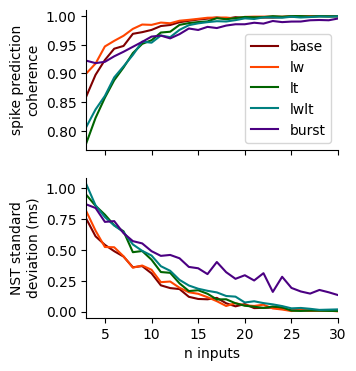

In [37]:
colors = {
    'base': 'maroon',
    'lw': 'orangered',
    'lt': 'darkgreen',
    'lwlt': 'teal',
    'burst': 'indigo'
}
ns = np.arange(3,31,1)

fig, axes = plt.subplots(2,1, figsize=(3.25,4), sharex=True)
for stim_type in spike_presence_prediction_acc_means:
    axes[0].plot(ns, spike_presence_prediction_acc_means[stim_type], c=colors[stim_type])
    
    axes[1].plot(ns, nst_std_means[stim_type], c=colors[stim_type])

axes[-1].set_xlim(3,30)

axes[0].set_ylabel('spike prediction\ncoherence')
axes[1].set_ylabel('NST standard\ndeviation (ms)')
axes[1].set_xlabel('n inputs')
axes[0].legend(list(colors.keys()))

axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.savefig(f'{figures_dir}spike_prediction_and_nst_std.svg', format='svg')
plt.savefig(f'{figures_dir}spike_prediction_and_nst_std.png', format='png', dpi=300)

plt.show()

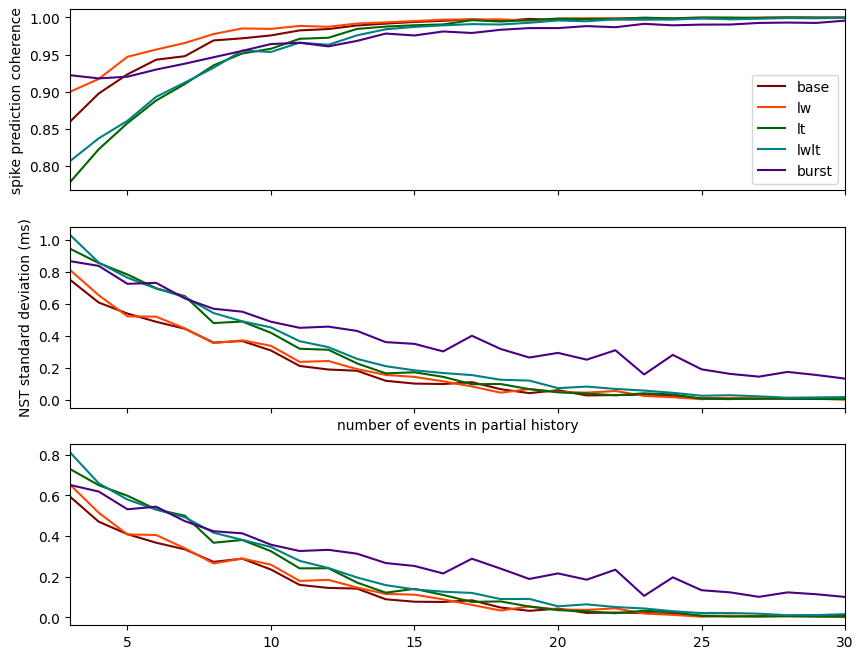

In [10]:
colors = {
    'base': 'maroon',
    'lw': 'orangered',
    'lt': 'darkgreen',
    'lwlt': 'teal',
    'burst': 'indigo'
}
ns = np.arange(3,31,1)

fig, axes = plt.subplots(3,1, figsize=(10,8), sharex=True)
for stim_type in spike_presence_prediction_acc_means:
    axes[0].plot(ns, spike_presence_prediction_acc_means[stim_type], c=colors[stim_type])
    
    axes[1].plot(ns, nst_std_means[stim_type], c=colors[stim_type])
    
    axes[2].plot(ns, nst_mae_means[stim_type], c=colors[stim_type])

axes[-1].set_xlim(3,30)

axes[0].set_ylabel('spike prediction coherence')
axes[1].set_ylabel('NST standard deviation (ms)')
axes[1].set_xlabel('number of events in partial history')
axes[0].legend(list(colors.keys()))
plt.show()

In [ ]:
## below moved to nst_distribution_evolution.ipynb

In [ ]:
def plot_example_nst_hist_evolution(t0_ind, n_stop=21):
    # something funky about passing in the correct t0_ind and it messing it up for the existing variable outside
    sample_events = sim_events.iloc[t0_ind-20: t0_ind, :]
    # plot raster
    stim_types = sample_events['event_type']
    stim_times = [stim - max(sample_events['event_time']) for stim in sample_events['event_time']]
    
    hist_axes = [str(ind) for ind in range(2,21)]
    hist_axes.reverse()
    
    gs_kw = dict( height_ratios=[.1, .9])
    fig, axd = plt.subplot_mosaic(
        [['raster']*19, hist_axes],
        gridspec_kw=gs_kw, figsize=(15, 5),
        )
    
    # raster
    axd['raster'].vlines(stim_times, 0, 1, colors=[color_event(stim) for stim in stim_types])
    axd['raster'].xaxis.tick_top()
    axd['raster'].set_yticks([])
    axd['raster'].set_xlim(min(stim_times)-2, 1)
    axd['raster'].set_title('time (ms)', fontsize=16)
    
    # histograms
    for n in range(2, n_stop):
        axd[str(n)].hist(sample_results[sample_results['n'] == n]['nst'], bins=bins, orientation="horizontal")
        spike_freq = round(np.sum(~np.isnan(sample_results[sample_results['n'] == n]['nst'])) /
                           sample_results[sample_results['n'] == n].shape[0] , 2)
        axd[str(n)].set_xlabel('\n'+str(n)+'\n\n'+str(spike_freq), fontsize=16)
        # aesthetics
        axd[str(n)].spines['bottom'].set_visible(False)
        axd[str(n)].spines['right'].set_visible(False)
        axd[str(n)].invert_yaxis()
        axd[str(n)].set_xticks([])
        if n < n_stop - 1:
            axd[str(n)].set_yticklabels([])
        else:
            axd[str(n)].set_ylabel('time (ms)', fontsize=16)
            
    
    fig.tight_layout()
    plt.show()
        
plot_example_nst_hist_evolution(400)

## calculate ks test

In [ ]:
results_sorted = results.sort_values(by='t0_ind')

In [ ]:
# takes ~20secs to run
spike_ratios = []
ks_results = []
# isolate each instance of the data
for i in range(len(list(set(results['t0_ind'])))):
    _slice = results.iloc[19000*i:19000*(i+1)]
    spike_ratio = np.sum(~np.isnan(_slice['nst'])) / 19000
    
    spike_ratios.append(spike_ratio)
    
    _ks_results = []
    for axes_ind, n in enumerate(range(2, 20)):
        n_samp = _slice[_slice['n'] == n]['nst'] # nth sample
        np1_samp = _slice[_slice['n'] == n+1]['nst'] # n+1 sample
        ks_res = stats.kstest(n_samp, np1_samp)
        _ks_results.append(ks_res.statistic)
    ks_results.append(_ks_results)

In [ ]:
plt.figure(figsize=(15,10))
for i, ks_result in enumerate(ks_results):
    if spike_ratios[i] < 0.1:
        plt.plot(range(2,20), ks_result)

In [ ]:
plt.figure(figsize=(15,10))
for i, ks_result in enumerate(ks_results):
    if spike_ratios[i] > 0.9:
        plt.plot(range(2,20), ks_result)

In [ ]:
plt.figure(figsize=(15,3))
spike_ks = [x for i, x in enumerate(ks_results) if spike_ratios[i] > 0.5]
spike_ks_inverted = [[spike_ks[i][j] for i in range(len(spike_ks))]  for j in range(0,18)]
plt.violinplot(spike_ks_inverted, np.arange(20,2,-1))
plt.scatter(np.arange(20,2,-1), np.sum(np.array(spike_ks), axis=0)/len(spike_ks), c='red', zorder=10)
plt.xticks(np.arange(3,21,1), [str(x-1)+'-'+str(x) for x in np.arange(20,2,-1)])
plt.xlabel('transition from n to n+1 stimuli')
plt.ylabel('KS test statistic')
plt.title('Change in NST distributions upon stimuli addition for predominantly spiking input trains')
plt.show()

In [ ]:
plt.figure(figsize=(15,3))
spike_ks = [x for i, x in enumerate(ks_results) if spike_ratios[i] < 0.5]
spike_ks_inverted = [[spike_ks[i][j] for i in range(len(spike_ks))]  for j in range(0,18)]
plt.violinplot(spike_ks_inverted, np.arange(20,2,-1))
plt.scatter(np.arange(20,2,-1), np.sum(np.array(spike_ks), axis=0)/len(spike_ks), c='red', zorder=10)
plt.xticks(np.arange(3,21,1), [str(x-1)+'-'+str(x) for x in np.arange(20,2,-1)])
plt.xlabel('transition from n to n+1 stimuli')
plt.ylabel('KS test statistic')
plt.title('Change in NST distributions upon stimuli addition for predominantly non-spiking input trains')
plt.show()

## calc mutual information

In [ ]:
def calc_MI(X,Y,bins):
    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]

    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)

    MI = H_X + H_Y - H_XY
    return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

## this MI code is producing negative values, which is a nono

In [ ]:
spike_ratios = []
ks_results = []
# isolate each instance of the data
for i in range(len(list(set(results['t0_ind'])))):
    _slice = results.iloc[19000*i:19000*(i+1)]
    spike_ratio = np.sum(~np.isnan(_slice['nst'])) / 19000
    
    spike_ratios.append(spike_ratio)
    
    _ks_results = []
    for axes_ind, n in enumerate(range(2, 20)):
        n_samp = _slice[_slice['n'] == n]['nst'] # nth sample
        np1_samp = _slice[_slice['n'] == n+1]['nst'] # n+1 sample
        ks_res = stats.kstest(n_samp, np1_samp)
        _ks_results.append(ks_res.statistic)
    ks_results.append(_ks_results)

In [ ]:
t0_ind = 63
_slice = results[results['t0_ind']==t0_ind]
print(_slice['t0_ind'].iloc[0])

MIs = []
for axes_ind, n in enumerate(range(2, 20)):
    n_samp = _slice[_slice['n'] == n]['nst'] # nth sample
    np1_samp = _slice[_slice['n'] == n+1]['nst'] # n+1 sample
    mi = calc_MI(n_samp, np1_samp, bins)
    MIs.append(mi)
print([mi for mi in MIs])

In [ ]:
t0_inds = list(set(results['t0_ind']))
results_MI = []
for t0_ind in t0_inds:
    _slice = results[results['t0_ind']==t0_ind]
    MIs = []
    for axes_ind, n in enumerate(range(2, 20)):
        n_samp = _slice[_slice['n'] == n]['nst'] # nth sample
        np1_samp = _slice[_slice['n'] == n+1]['nst'] # n+1 sample
        mi = calc_MI(n_samp, np1_samp, bins)
        if mi < 0:
            print(mi, t0_ind)
        MIs.append(mi)
    results_MI.append(MIs)

In [ ]:
plt.figure(figsize=(15,3))
spike_mi = [x for i, x in enumerate(results_MI) if spike_ratios[i] < 0.5]
spike_mi_inverted = [[spike_mi[i][j] for i in range(len(spike_mi)) if ~np.isnan(spike_mi[i][j])]  for j in range(0,18)] # remove nans
plt.violinplot(spike_mi_inverted, np.arange(20,2,-1))
plt.scatter(np.arange(20,2,-1), np.sum(np.array(spike_mi), axis=0)/len(spike_mi), c='red', zorder=10)
plt.xticks(np.arange(3,21,1), [str(x-1)+'-'+str(x) for x in np.arange(20,2,-1)])
plt.xlabel('transition from n to n+1 stimuli')
plt.ylabel('mutual information')
plt.title('Change in NST distributions upon stimuli addition for predominantly spiking input trains')
plt.show()

In [ ]:
spike_mi_inverted